# <span style='font-family:Georgia'> Credit card client payment default prediction
    
<span style='font-family:Georgia'> The goal is to predict whether a credit client customer would default payment or not based on the following attributes and target variable;

### Attributes:
- <span style='font-family:Georgia'> ID
- <span style='font-family:Georgia'> LIMIT_BAL: Amount of the given credit (NT dollar)
- <span style='font-family:Georgia'> SEX: Gender(1 = male; 2 = female)
- <span style='font-family:Georgia'> EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- <span style='font-family:Georgia'> MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)
- <span style='font-family:Georgia'> AGE: in year
- <span style='font-family:Georgia'> PAY_0	to PAY_6 (History of past payments, whether the client paid duly or delayed payment for few months in NT dollar)
- <span style='font-family:Georgia'> BILL_AMT1	to BILL_AMT6 (Amount of bill payment in NT dollar)
- <span style='font-family:Georgia'> PAY_AMT1	to PAY_AMT6 (Amount of previous payment in NT dollar)

*<span style='font-family:Georgia'> NT dollar = New Taiwan dollar

### Target variable:
- <span style='font-family:Georgia'> default payment next month (yes or no)


## <span style='font-family:Georgia'> Setup


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

### <span style='font-family:Georgia'> Load the data (the data was obtained from UCI repository)

In [2]:
data_path = os.path.join('datasets', 'default of credit card clients.xls')
dataset = pd.read_excel(data_path)

In [3]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- <span style='font-family:Georgia'> ID contains serial number of the customer, this feature will provide no information for our model and will be removed.
- <span style='font-family:Georgia'> SEX and MARRIAGE are both categorical variables and will be transformed before being fed to the algorithm.
- <span style='font-family:Georgia'> EDUCATION column has the ordinal numbers of the clients' education level. This informs us of how each client education compares with others. (1 = graduate school; 2 = university; 3 = high school; 4 = others). This feature will be treated as ordinal variable


### <span style='font-family:Georgia'> Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<span style='font-family:Georgia'> Luckily, this dataset has no null-values. All the attributes are numerical integers. 

In [6]:
dataset.shape

(30000, 25)

In [7]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- <span style='font-family:Georgia'> Default payment: wow ...Only 22% of the customers defaulted in their previous payment. This means that the target label is a bit skewed. hence accuracy won't be suitable to evaluate our model performance. f1_score will be the metric for evaluation.
- <span style='font-family:Georgia'> This task is a binary imbalance classification problem. Having a large proportion (about 78%) of the examples with the negative class label (0) and about 22% with the positive class label (1). This imbalance could affect model performance, hence, the training data will be transformed to have more balanced distribution. 
- <span style='font-family:Georgia'> Limit balance: The average amount of given credit is 167,484 NT dollar.
- <span style='font-family:Georgia'> Age: The average age of the clients is 35years and the oldest client is 79years old.

<span style='font-family:Georgia'> We now extract some information from the categorical variables

Text(0, 0.5, 'Number of clients')

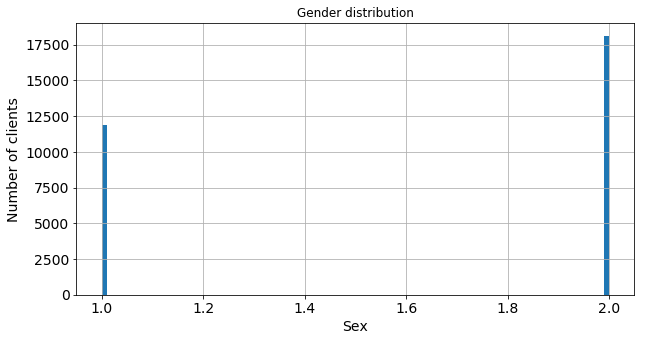

In [8]:
dataset['SEX'].hist(bins=100, figsize=(10,5))
plt.tick_params(labelsize=14)
plt.title('Gender distribution')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of clients', fontsize=14)

Text(0, 0.5, 'Number of clients')

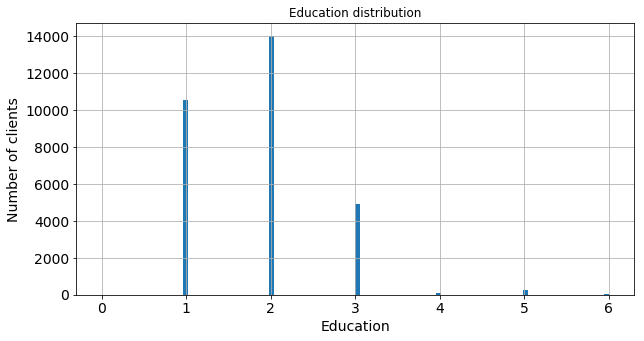

In [9]:
dataset['EDUCATION'].hist(bins=100, figsize=(10,5))
plt.tick_params(labelsize=14)
plt.title('Education distribution')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Number of clients', fontsize=14)

Text(0, 0.5, 'Number of clients')

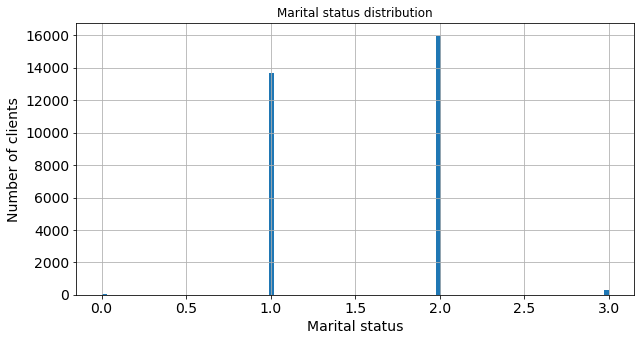

In [10]:
dataset['MARRIAGE'].hist(bins=100, figsize=(10,5))
plt.tick_params(labelsize=14)
plt.title('Marital status distribution')
plt.xlabel('Marital status', fontsize=14)
plt.ylabel('Number of clients', fontsize=14)

- <span style='font-family:Georgia'> 60% of the clients are female
- <span style='font-family:Georgia'> About 47% of them have a university degree
- <span style='font-family:Georgia'> About 53% of the clients are single (hmm, i wonder why the singles are more, it seems they spent the money on education) 

Text(0.5, 1.0, 'Distribution')

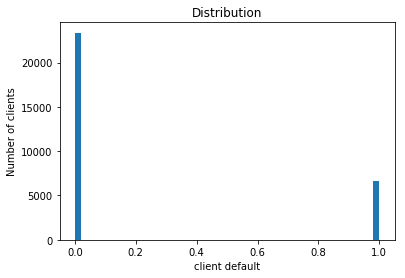

In [11]:
plt.hist('default payment next month', bins=50, data=dataset)
plt.xlabel('client default')
plt.ylabel('Number of clients')
plt.title('Distribution')

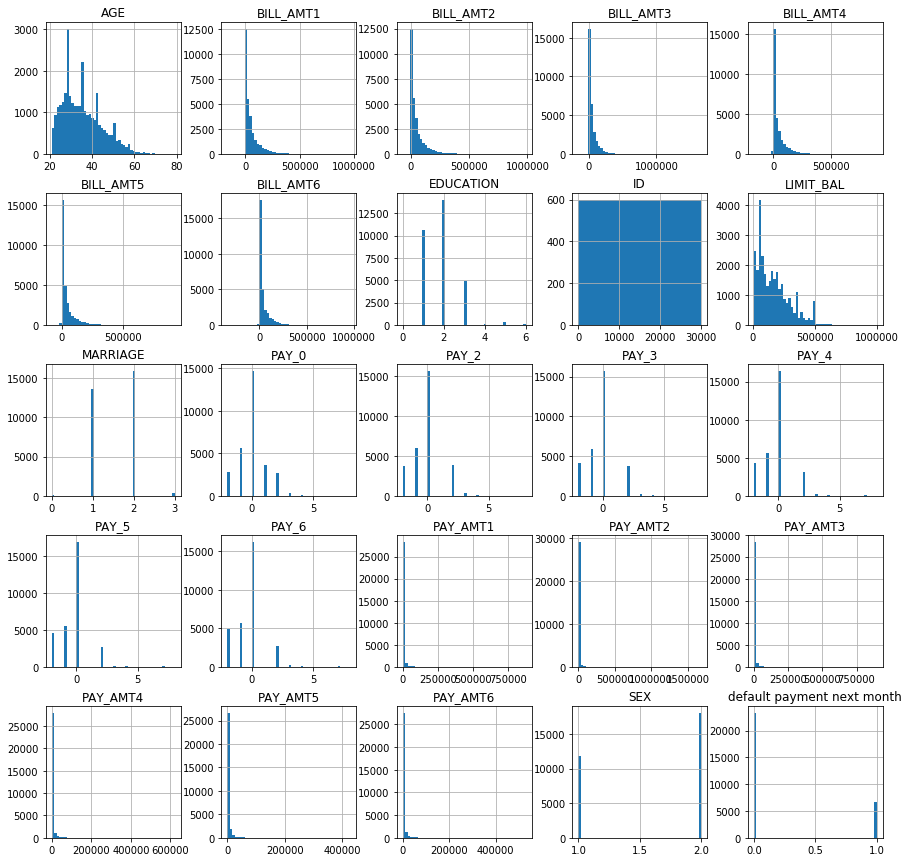

In [12]:
# Plot distribution of each feature values
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(15, 15))
plt.show()

Some insights in the dataset:
- <span style='font-family:Georgia'>The repayment history plots (PAY_0 to PAY_6)of the clients show that a large portion of them make their repayment duly. 
- <span style='font-family:Georgia'>The target variable (default payment next month) is imbalanced in favour of the majority class, this could result in our model being biased towards the majority class and a poor predictive performance of the minority class which is of more interest for this task. The imbalance nature of the dataset will then be dealt with by resampling it.


### <span style='font-family:Georgia'> Check correlation between each feature  and the target variable

In [13]:
corr_matrix = dataset.corr()

corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

<span style='font-family:Georgia'> Of all the features, the clients history of past payments (PAY_0 to PAY_6) have high positive correlation with the target while the amount of given credit (LIMIT_BAL) 
has a negative correlation with the target. This can also be visualized in the plots below.  

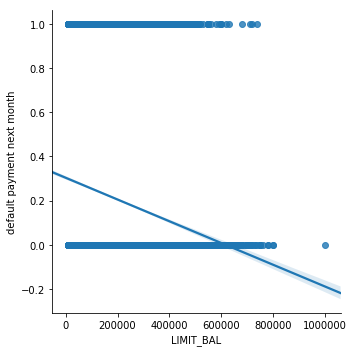

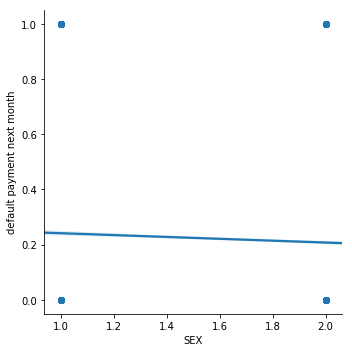

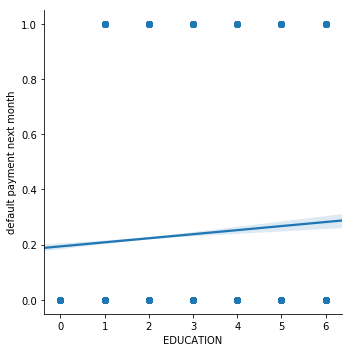

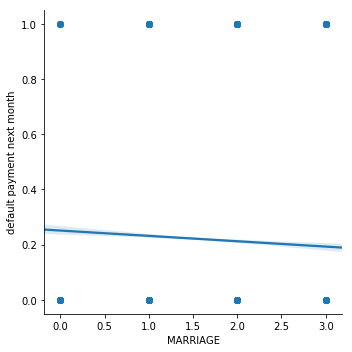

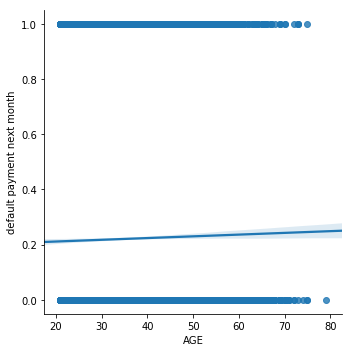

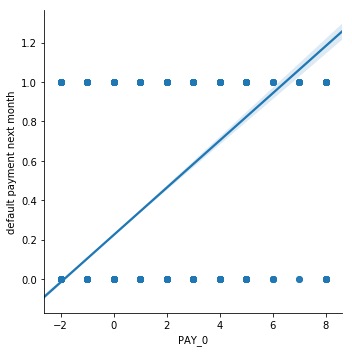

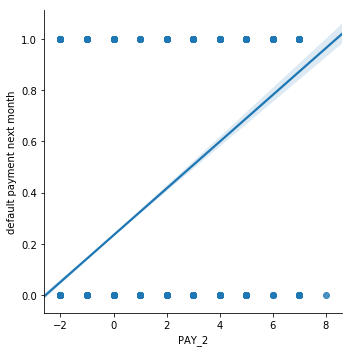

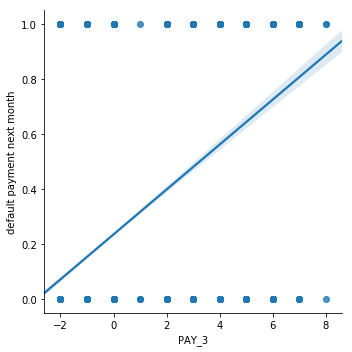

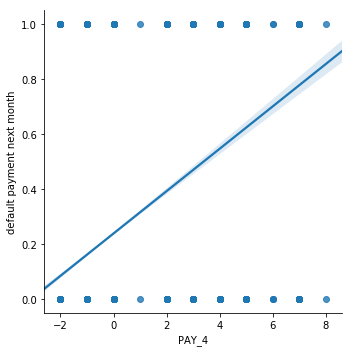

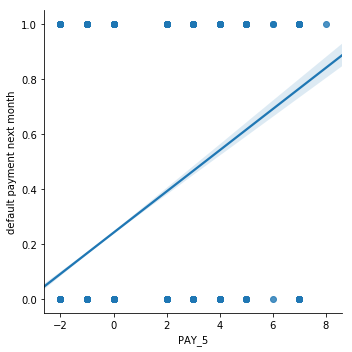

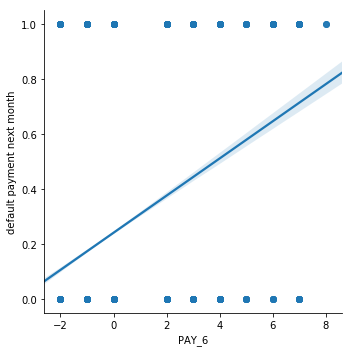

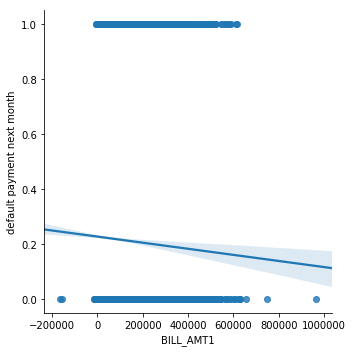

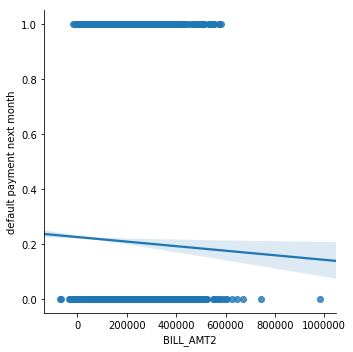

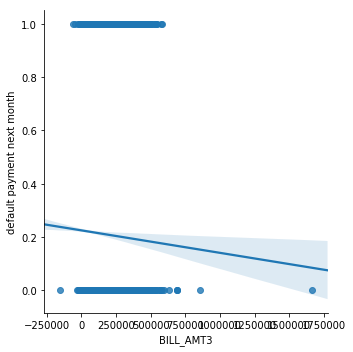

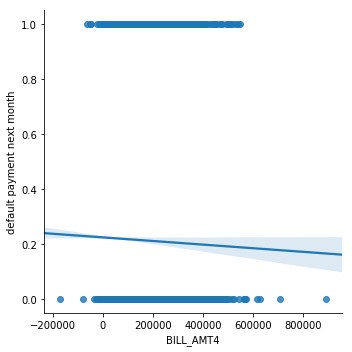

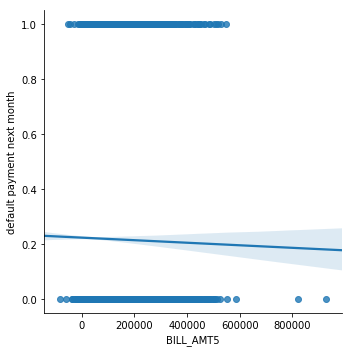

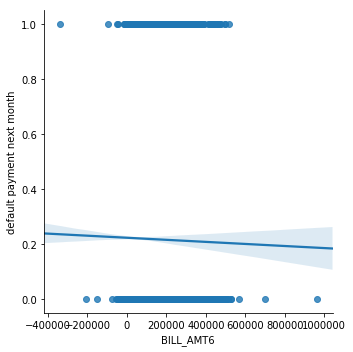

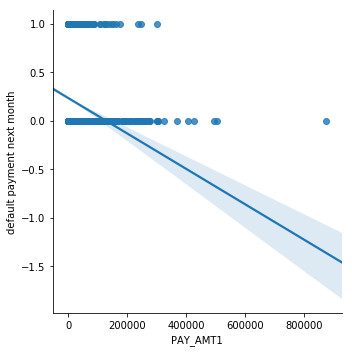

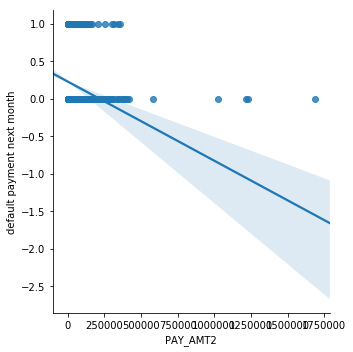

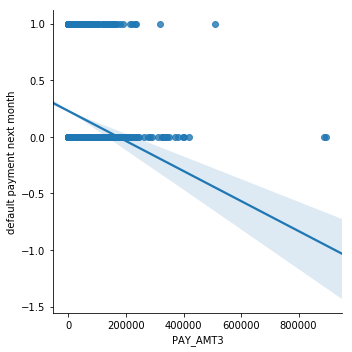

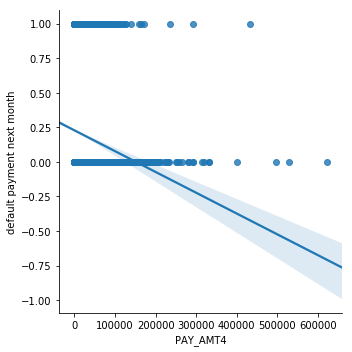

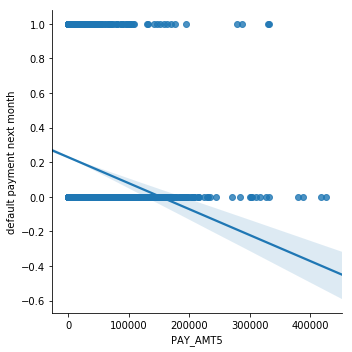

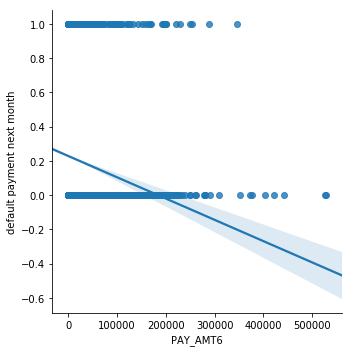

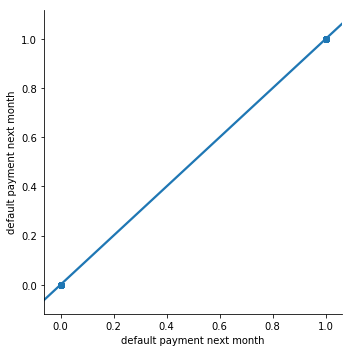

In [14]:
import seaborn as sns
for i in range(1 , len(dataset.columns)):
    sns.lmplot(dataset.columns[i], 'default payment next month', data = dataset)

###  <span style='font-family:Georgia'>Data preparation

In [15]:
# seaparate training feature matrix(X) from the target variable vector (y)
dataset_X = dataset.drop('default payment next month', axis=1)
dataset_y = dataset['default payment next month']

<span style='font-family:Georgia'> Methods to deal with class imbalance to provide a more balanced dataset are: Oversampling of the minority or undersampling of the majority class using SMOTE class in imbalance-learn library. For this task, a data resampling technique called Edited Nearest Neighbors Undersampling with SMOTE oversampling is adopted which combines both data oversampling of the minority class label and undersampling of the majority class label. 

In [16]:
# Resample dataset
from imblearn.combine import SMOTEENN
# class distribution before resampling
print('Number of class 1 samples before resampling:', dataset_X[dataset_y == 1].shape[0])
print('Number of class 0 samples before resampling:', dataset_X[dataset_y == 0].shape[0])
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_resampled, y_resampled = sample.fit_resample(dataset_X, dataset_y)
# class distribution after resampling
print('Number of class 1 samples after resampling:', X_resampled[y_resampled == 1].shape[0])
print('Number of class 0 samples after resampling:', X_resampled[y_resampled == 0].shape[0])

Using TensorFlow backend.


Number of class 1 samples before resampling: 6636
Number of class 0 samples before resampling: 23364
Number of class 1 samples after resampling: 4057
Number of class 0 samples after resampling: 11361


In [17]:
# Split dataset into train and test set
# Stratify attribute is set to class y to ensure that the train and test set have the same class proportion as in the original dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

### <span style='font-family:Georgia'>Transformation of categorical variables: SEX and MARRIAGE

In [18]:
# Deal with the categorical features(SEX and MARRIAGE) in the dataset
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train[['SEX', 'MARRIAGE']]).toarray()
X_train_ohe = pd.DataFrame(X_train_ohe)
X_train_ohe.head()


,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# Ensure the one-hot encoded data has the same as the remaining training data
X_train_ohe.index = X_train.index

In [20]:
# Concatenate the transformed features to the training set
X_train = pd.concat([X_train, X_train_ohe], axis=1)

In [21]:
# Remove the transformed features from the original data
X_train.drop(['SEX', 'MARRIAGE'], axis=1, inplace=True)


### <span style='font-family:Georgia'>Model development

In [22]:
# This function will allow training and evaluation of different ML models at once.
def eval_algorithm(algorithm, X_train, y_train, svm=False):
    """Function to train and evaluate models"""
    
    if svm:
        scaler = sklearn.preprocessing.StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        
        #train svm model
        model = algorithm.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        
        #evaluate svm performance
        f1_score = metrics.f1_score(y_train, y_train_pred)
        f1_score = round(f1_score * 100, 2)
        return model, f1_score, y_train_pred
    
    else:
        # train other models
        model = algorithm.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)


        # compute f1_score
        f1_score = metrics.f1_score(y_train, y_train_pred)
        f1_score = round(f1_score * 100, 2)
        return model, f1_score, y_train_pred
    
    
    

In [23]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix

<span style='font-family:Georgia'> During training the class_weight attribute of the algorithm is set to 'balanced' to ensure cost-sensitivity in the model.
This will make the model to be penalized for classification errors for the minority class (class of interest) i.e when default payment=yes
than for the majority class i.e (when default payment=no)

In [24]:
# Train and evaluate logistic regression algorithm
log_clf, f1_score_log_clf, log_pred = eval_algorithm(LogisticRegression(solver='liblinear', class_weight='balanced'), X_train, y_train)
print('Logistic regression model result:\nf1_score:{}'.format(f1_score_log_clf))


Logistic regression model result:
f1_score:57.21


In [25]:
svm_clf, f1_score_svm_clf, svm_pred = eval_algorithm(SVC(), X_train, y_train, svm=True)
print('SVM model result:\nf1_score:{}'.format(f1_score_svm_clf))


SVM model result:
f1_score:69.73


In [26]:
knn_clf, f1_score_knn_clf, knn_pred = eval_algorithm(KNeighborsClassifier(), X_train, y_train)
print('KNN classifier model result:\nf1_score:{}'.format(f1_score_knn_clf))


KNN classifier model result:
f1_score:89.37


In [27]:
RF_clf, f1_score_RF_clf, RF_pred = eval_algorithm(RandomForestClassifier(class_weight='balanced'), X_train, y_train)
print('RF classifier model result:\nf1_score:{}'.format(f1_score_RF_clf))


RF classifier model result:
f1_score:100.0


In [28]:
xgb_clf, f1_score_xgb_clf, xgb_pred = eval_algorithm(XGBClassifier(class_weight='balanced'), X_train, y_train)
print('xgb classifier model result:\nf1_score:{} '.format(f1_score_xgb_clf))


xgb classifier model result:
f1_score:73.96 


In [29]:
print('Model performance comparison')

model_results = pd.DataFrame({'Model': ['Logistic Regression', 'SVC', 'KNN', 'Random forest', 'Xgboost'],
             'F1_score': [f1_score_log_clf, f1_score_svm_clf, f1_score_knn_clf, f1_score_RF_clf, f1_score_xgb_clf]})

model_results.sort_values(by='F1_score', ascending=False)

Model performance comparison


,Model,F1_score
3,Random forest,100.00
2,KNN,89.37
4,Xgboost,73.96
1,SVC,69.73
0,Logistic Regression,57.21


<span style='font-family:Georgia'>As random forest outperformed other models, it will now be evaluated by making predictions on the test set to determine how it would perform on future unseen dataset.

In [30]:
# Transform the test set
X_test_ohe = encoder.transform(X_test[['SEX', 'MARRIAGE']]).toarray()
X_test_ohe = pd.DataFrame(X_test_ohe)




In [31]:
X_test_ohe.index = X_test.index

In [32]:
# Concatenate the tranformed features (SEX and MARRIAGE) 
X_test = pd.concat([X_test, X_test_ohe], axis=1)

X_test.drop(['SEX', 'MARRIAGE'], axis=1, inplace=True)


In [33]:
RF_pred_test = RF_clf.predict(X_test)
print('Random forest f1_score_test: %.2f' % (metrics.f1_score(y_test, RF_pred_test) * 100))



Random forest f1_score_test: 77.30


In [34]:
print('Random forest precision_score: %.2f' % (metrics.precision_score(y_test, RF_pred_test) * 100))

Random forest precision_score: 86.56


In [35]:
print('Random forest recall_score: %.2f' % (metrics.recall_score(y_test, RF_pred_test) * 100))

Random forest recall_score: 69.83


<span style='font-family:Georgia'>Random forest which according to this task is the model of choice for predicting credit risk has 87% capacity of precisely predicting the positive class 1(i.e when default = yes) 
also it has a sensitivity rate of about 70% i.e it has a good ability to detect the positive class 1. The model performance on the test set isn't as excellent as it was on the training set, this is a sign of model overfitting. This can be improved by collecting more dataset. 

<span style='font-family:Georgia'>Check misclassified sample labels

In [36]:
# Function to determine misclassified classes. 
def confusion_matx(y_test, y_pred):
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(data=con_mat, columns=['Negative', 'Positive'], index=['Negative', 'Positive'])
    con_mat.columns.name = 'Predicted label'
    con_mat.index.name = 'True label'
    error_rate = (y_pred != y_test).mean()
    print('Model error rate: %.2f' % (error_rate * 100))
    return con_mat

In [37]:
confusion_matx(y_test, RF_pred_test)

Model error rate: 10.80


Predicted label,Negative,Positive
True label,,
Negative,2184,88
Positive,245,567


<span style='font-family:Georgia'>This shows that the random forest model has few false positive and a fare false negative prediction and in general, the model has an error rate of about 10%. 
- <span style='font-family:Georgia'>The next step will be to try out other data resampling methods like oversampling of the minority class or undersampling the majority class. More so, the features can be log-transformed to obtain a normal distribution. 